In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from importlib import reload
import xgboost as xgb 
from matplotlib.ticker import FormatStrFormatter

codebase_path = '/data/home/wpw035/Codebase'
sys.path.insert(0, codebase_path) #add path to my codebase models



In [2]:
from Genral_plotting import plotting as plot_nb
reload(plot_nb)

<module 'Genral_plotting.plotting' from '/data/home/wpw035/Codebase/Genral_plotting/plotting.py'>

In [3]:
path_xg_prot = 'XGboost/Unseen_cell_line_testing/LC-metric-results/Prot'
path_xg_rna = 'XGboost/Unseen_cell_line_testing/LC-metric-results/RNA'
path_xg_hot = 'XGboost/Unseen_cell_line_testing/LC-metric-results/One-hot'
path_xg_phos = 'XGboost/Unseen_cell_line_testing/LC-metric-results/Phos'
path_xg_phosltl = 'XGboost/Unseen_cell_line_testing/LC-metric-results/Phos_LTL'
path_mm = 'Neural-net/Unseen_cell_line_testing/LC-metric-results/Mean_model'

path_cnn_prot = 'Neural-net/Unseen_cell_line_testing/LC-metric-results/Prot'
path_cnn_rna = 'Neural-net/Unseen_cell_line_testing/LC-metric-results/RNA'
path_cnn_hot = 'Neural-net/Unseen_cell_line_testing/LC-metric-results/One-hot'
path_cnn_phos = 'Neural-net/Unseen_cell_line_testing/LC-metric-results/Phos'
path_cnn_phos_1024 = 'Neural-net/Unseen_cell_line_testing/LC-metric-results/Phos_1024'
path_cnn_photarget = 'Neural-net/Unseen_cell_line_testing/LC-metric-results/Phos_target'
path_cnn_phosltl = 'Neural-net/Unseen_cell_line_testing/LC-metric-results/Phos_LTL'


In [4]:
def find_repeats(dir_path, num_runs):
    r2_reps = {}
    mse_reps = {}
    rho_reps = {}
    for run in range(num_runs):
        temp_df = pd.read_csv(f'{dir_path}/run{run}')
        r2_reps[f'run{run}'] = temp_df['r2']
        mse_reps[f'run{run}'] = temp_df['mse']
        rho_reps[f'run{run}'] = temp_df['rho']
    r2_reps = pd.DataFrame(r2_reps)
    mse_reps = pd.DataFrame(mse_reps)
    rho_reps = pd.DataFrame(rho_reps)
    
    r2_reps.index = temp_df['train size']
    mse_reps.index = temp_df['train size']
    rho_reps.index = temp_df['train size']
    
    return r2_reps, mse_reps, rho_reps

In [5]:
r2_xg_rna, mse_xg_rna, rho_xg_rna = find_repeats(path_xg_rna, 30)
r2_xg_prot, mse_xg_prot, rho_xg_prot = find_repeats(path_xg_prot, 30)
r2_xg_hot, mse_xg_hot, rho_xg_hot = find_repeats(path_xg_hot, 30)
r2_xg_phos, mse_xg_phos, rho_xg_phos = find_repeats(path_xg_phos, 30)
r2_xg_ltl, mse_xg_ltl, rho_xg_ltl= find_repeats(path_cnn_phosltl, 30)
r2_mm, mse_mm, rho_mm = find_repeats(path_mm, 30)
r2_xg_ltl, mse_xg_ltl, rho_xg_ltl= find_repeats(path_xg_phosltl, 30)

In [6]:
r2_cnn_rna, mse_cnn_rna, rho_cnn_rna = find_repeats(path_cnn_rna, 30)
r2_cnn_prot, mse_cnn_prot, rho_cnn_prot = find_repeats(path_cnn_prot, 30)
r2_cnn_hot, mse_cnn_hot, rho_cnn_hot = find_repeats(path_cnn_hot, 30)
r2_cnn_phos, mse_cnn_phos, rho_cnn_phos = find_repeats(path_cnn_phos, 30)
r2_cnn_phos2, mse_cnn_phos2, rho_cnn_phos2 = find_repeats(path_cnn_phos_1024, 30)
r2_cnn_phostarget, mse_cnn_phostarget, rho_cnn_phostarget = find_repeats(path_cnn_photarget, 30)
r2_cnn_ltl, mse_cnn_ltl, rho_cnn_ltl= find_repeats(path_cnn_phosltl, 30)

In [35]:
r2_cnn_phostarget.mean(axis=1).iloc[-3: ],  mse_cnn_phostarget.mean(axis=1).iloc[-3 : ]

(train size
 5739    0.717651
 6315    0.720708
 6949    0.722780
 dtype: float64,
 train size
 5739    1.901118
 6315    1.879805
 6949    1.865505
 dtype: float64)

In [39]:
r2_cnn_ltl.mean(axis=1).iloc[-3: ], mse_cnn_ltl.mean(axis=1).iloc[-3 : ]

(train size
 5739    0.722537
 6315    0.715928
 6949    0.726091
 dtype: float64,
 train size
 5739    1.867818
 6315    1.909865
 6949    1.843885
 dtype: float64)

In [38]:
r2_cnn_rna.mean(axis=1).iloc[-3: ],  mse_cnn_rna.mean(axis=1).iloc[-3 : ]

(train size
 5739    0.723781
 6315    0.724864
 6949    0.723408
 dtype: float64,
 train size
 5739    1.858010
 6315    1.851060
 6949    1.860859
 dtype: float64)

In [32]:
mse_cnn_phostarget.iloc[-1].mean()

1.865505224524775

In [22]:
mse_cnn_phostarget.iloc[-1].mean()

1.865505224524775

In [9]:
r2_xg_rna

,run0,run1,run2,run3,run4,run5,run6,run7,run8,run9,...,run20,run21,run22,run23,run24,run25,run26,run27,run28,run29
train size,,,,,,,,,,,,,,,,,,,,,
2,-0.009954,-0.009088,-0.500123,-0.000415,-0.039736,-0.001795,-0.068352,-0.002793,-0.253178,-0.000004,...,-0.133732,-0.009688,-0.005611,-0.227373,-0.004479,-0.033027,-0.039636,-0.030458,-0.044046,-0.009951
4,-0.058944,-0.000398,-0.304536,-0.013491,-0.239060,-0.001395,-0.449144,-0.007479,-0.136185,-0.094438,...,-0.061510,0.014660,0.011157,-0.030004,-0.030140,-0.022743,0.003752,-0.077588,-0.154219,-0.235248
11,-0.525867,-0.031703,-0.288217,-0.075059,-0.097309,0.002581,-0.083701,-0.027459,-0.010986,0.059817,...,-0.125346,-0.013223,-0.001285,-0.470155,-0.312318,-0.035571,0.004593,-0.021544,-0.077788,-0.222978
26,-0.269531,-0.173180,-0.255022,-0.015921,-0.073659,-0.242468,-0.436758,0.060044,-0.044397,0.040483,...,-0.320335,-0.028935,-0.181125,-0.136660,-0.125319,-0.058071,-0.044510,-0.012426,-0.122179,0.020992
64,-0.043892,-0.006314,0.047613,0.022329,-0.057240,-0.023492,-0.182624,0.095169,-0.070310,0.030106,...,0.017497,0.059440,-0.048258,-0.090294,-0.370551,-0.097418,-0.166358,-0.045328,-0.218718,0.058709
70,-0.136266,-0.067419,-0.015485,-0.088584,-0.164775,-0.065732,-0.023687,-0.021685,-0.151803,0.009023,...,-0.134037,0.016311,-0.005237,-0.061769,-0.050393,-0.037519,-0.178122,-0.124607,-0.035792,-0.036772
77,-0.015688,0.004920,0.029122,-0.028281,-0.113950,-0.499608,0.050679,-0.128978,-0.189730,-0.028520,...,0.002297,0.049045,0.014436,0.006920,-0.101966,0.038693,-0.424473,0.002132,0.012716,-0.002004
85,0.007000,-0.017266,0.019212,0.043408,0.004992,0.011669,-0.061211,0.027078,-0.062456,-0.150449,...,0.079468,-0.020988,-0.080307,0.026412,0.044951,0.132643,-0.178461,-0.045350,0.037842,-0.064926
93,0.102250,-0.191789,0.067053,0.018247,-0.178158,0.047405,0.008060,-0.381475,-0.039464,-0.005450,...,0.052519,-0.022274,-0.010939,-0.050680,-0.108497,0.056249,0.021531,0.130064,0.070274,-0.003356


In [296]:
r2_cnn_hot

,run0,run1,run2,run3,run4,run5,run6,run7,run8,run9,...,run20,run21,run22,run23,run24,run25,run26,run27,run28,run29
train size,,,,,,,,,,,,,,,,,,,,,
2,-0.018189,-0.008593,-0.462900,-0.069117,-0.157805,-0.055206,-0.366298,-0.102785,-0.462680,-0.017593,...,-0.296548,-0.000812,-0.031843,-0.213433,-0.017573,-0.100169,-0.011328,-0.060985,-0.255513,-0.150726
4,-0.051551,-0.042852,-0.548449,-0.165483,-0.154736,-0.020497,-0.192995,-0.021075,-0.143174,-0.020831,...,-0.034132,-0.036665,-0.006746,-0.079653,-0.048336,-0.040463,-0.031180,-0.081789,-0.262012,-0.226887
11,-0.111812,-0.091328,-0.109340,-0.074123,-0.091139,-0.012494,-0.058247,-0.045931,-0.077864,-0.003086,...,-0.101469,-0.029042,-0.030416,-0.195577,-0.312375,-0.081676,-0.024666,-0.078959,-0.056731,-0.002745
26,-0.018171,0.027375,-0.142817,-0.158778,-0.154022,-0.056523,-0.206743,-0.014746,-0.135344,-0.031846,...,-0.143895,-0.004887,0.030174,-0.133517,0.019645,-0.085028,-0.169073,-0.042671,-0.075220,0.006339
64,0.051927,0.066524,-0.029585,0.025061,-0.057773,-0.026811,0.021397,0.013839,-0.109360,0.025811,...,0.024119,0.016562,0.015665,-0.032701,0.014397,-0.074646,0.018160,0.021658,0.046425,0.085613
70,0.027361,0.064062,0.058908,-0.036455,0.066583,0.013815,0.023466,0.024508,-0.112485,0.015104,...,-0.040472,0.025559,0.083195,-0.000719,0.043199,-0.072219,-0.097144,-0.013780,0.073357,0.114847
77,0.076117,0.067367,0.047392,0.031176,-0.055499,0.001959,-0.077647,-0.162143,-0.092171,0.007746,...,-0.051733,0.030954,0.066990,-0.017285,0.058021,0.071391,0.057043,0.079537,0.111376,0.079411
85,0.053850,0.092267,0.030253,0.023683,0.074357,0.050294,-0.061084,-0.106540,-0.088361,0.007402,...,-0.066867,0.038355,0.065307,-0.039963,-0.021681,-0.090938,0.023014,0.021239,0.047519,0.155896
93,0.033330,0.030590,0.017222,-0.003900,-0.044506,0.007361,-0.043101,-0.013405,-0.061975,0.011359,...,-0.011169,0.015655,0.080302,0.004907,-0.000956,-0.060300,0.039953,0.021640,0.049700,0.141506


In [297]:
r2_cnn_rna

,run0,run1,run2,run3,run4,run5,run6,run7,run8,run9,...,run20,run21,run22,run23,run24,run25,run26,run27,run28,run29
train size,,,,,,,,,,,,,,,,,,,,,
2,-0.007842,-0.014320,-0.028209,-0.018560,-0.003214,0.004855,-0.001312,-0.029154,-0.068896,0.055733,...,-0.042242,-0.009787,-0.002743,-0.053845,-0.003526,-0.034031,0.000274,-0.052197,0.010925,0.057297
4,-0.030371,0.019206,-0.003679,-0.023151,0.002454,0.009789,-0.063691,-0.003951,0.002751,0.013575,...,-0.007758,0.008041,-0.002202,-0.041571,-0.002845,-0.049644,-0.002039,-0.012327,-0.007652,-0.002933
11,-0.068509,0.000833,-0.069958,-0.030324,-0.024368,0.000097,-0.013432,-0.005266,-0.043713,0.040395,...,-0.016962,-0.003157,-0.005779,-0.072785,-0.018738,-0.033034,0.001351,-0.004941,0.000516,0.072498
26,-0.004328,0.014439,-0.078697,-0.009259,-0.000082,-0.005855,0.004607,0.012500,-0.026357,0.071446,...,-0.006536,0.022838,-0.000531,-0.018440,0.000155,-0.024183,0.012790,-0.004924,-0.018594,0.067306
64,-0.018026,0.024971,-0.031844,-0.019635,0.005990,-0.006274,0.030365,0.059329,-0.037341,0.015779,...,-0.020959,0.013555,0.006277,-0.053505,-0.013121,0.048308,0.008395,-0.016998,0.014949,0.023369
70,-0.011539,0.022609,-0.051657,0.000027,0.006901,-0.000004,0.025683,0.022126,-0.037584,0.012335,...,-0.008911,0.045777,0.002800,-0.040408,-0.032665,-0.008629,0.007421,-0.009519,0.012907,0.039452
77,0.085487,0.027170,-0.032437,-0.006456,0.013878,0.002681,0.040534,-0.062652,-0.045340,0.014208,...,0.008491,0.010741,0.004650,0.066715,0.004594,0.019961,0.009380,-0.024192,0.032498,0.027610
85,-0.034878,0.028343,-0.031646,-0.008050,0.042008,0.001868,0.006967,-0.012905,-0.049092,0.004556,...,-0.006734,0.010626,0.033036,-0.041778,0.002195,-0.028500,0.022452,0.043568,0.024012,0.018440
93,0.031051,0.026567,0.095973,-0.019148,-0.016593,0.001727,0.025553,-0.024027,-0.057020,-0.005057,...,0.027178,0.001748,0.006287,-0.071672,0.007470,-0.021849,0.014655,-0.003068,0.012596,0.049024


In [298]:
r2_xg_hot

,run0,run1,run2,run3,run4,run5,run6,run7,run8,run9,...,run40,run41,run42,run43,run44,run45,run46,run47,run48,run49
train size,,,,,,,,,,,,,,,,,,,,,
2,-0.011372,-0.009238,-0.040819,-0.019837,-0.025811,-0.003792,-0.007493,-0.028733,-0.253178,0.001539,...,-0.000430,-0.011196,-0.085311,-0.078579,-0.000562,-0.054307,-0.054182,-0.222229,-0.000761,-0.020393
4,-0.007006,-0.009048,-0.224256,-0.020242,-0.028380,0.002123,0.001712,-0.027885,-0.044098,-0.067415,...,-0.000583,-0.012505,-0.022893,-0.254124,-0.000384,0.001611,-0.062606,0.001335,0.005216,-0.042468
11,0.003953,-0.002218,0.012489,-0.015888,-0.001201,0.003456,0.015964,-0.032167,-0.027927,-0.009461,...,0.011588,-0.004446,-0.006225,0.002369,0.003947,0.010972,-0.053957,0.006282,0.002232,-0.019868
26,0.047020,0.038739,0.042853,-0.012542,0.027192,0.013449,0.061283,-0.026532,-0.037519,0.018186,...,0.019658,0.023167,0.016442,0.037452,0.014611,0.020254,-0.042915,0.041293,0.020824,0.009004
64,0.076905,0.049355,0.092959,0.017633,0.084229,0.059212,0.126371,0.074541,0.009133,0.010435,...,0.039694,0.005512,0.040821,0.069243,0.027770,0.049062,-0.014487,0.161269,0.048572,0.043828
70,0.091899,0.037552,0.100332,0.009271,0.083118,0.082954,0.133113,0.070312,0.001626,0.003685,...,0.065638,0.023397,0.099471,0.076075,0.032537,0.057381,0.016856,0.180215,0.042788,0.064735
77,0.109852,0.065986,0.105561,0.059259,0.098544,0.072077,0.140140,0.103370,0.069331,-0.005615,...,0.072110,0.019099,0.043467,0.068093,0.027784,0.057528,0.004276,0.188743,0.043890,0.046035
85,0.111842,0.035010,0.145256,0.043242,0.086651,0.111204,0.142287,0.109861,0.067361,0.005263,...,0.094726,0.049100,0.090474,0.086812,0.044319,0.059779,0.011422,0.205226,0.086382,0.069548
93,0.109263,0.056312,0.176878,0.060320,0.099354,0.125963,0.156698,0.113717,0.034883,-0.001635,...,0.100939,0.037584,0.078539,0.092035,0.037295,0.074906,0.001352,0.208140,0.116669,0.061838


In [299]:
r2_xg_rna

,run0,run1,run2,run3,run4,run5,run6,run7,run8,run9,...,run40,run41,run42,run43,run44,run45,run46,run47,run48,run49
train size,,,,,,,,,,,,,,,,,,,,,
2,-0.009954,-0.009088,-0.500123,-0.000415,-0.039736,-0.001795,-0.068352,-0.002793,-0.253178,-0.000004,...,-0.000972,-0.015745,-0.140832,-0.114397,0.027974,-0.152129,-0.094817,-0.354668,0.039865,-0.036781
4,-0.058944,-0.000398,-0.304536,-0.013491,-0.239060,-0.001395,-0.449144,-0.007479,-0.136185,-0.094438,...,-0.070524,-0.000904,-0.021285,-0.254124,0.010076,-0.203291,-0.052935,-0.127288,-0.145187,-0.142780
11,-0.525867,-0.031703,-0.288217,-0.075059,-0.097309,0.002581,-0.083701,-0.027459,-0.010986,0.059817,...,-0.285082,0.052680,-0.121116,-0.027708,0.004690,-0.013354,-0.020021,-0.195251,0.005707,-0.091667
26,-0.269531,-0.173180,-0.255022,-0.015921,-0.073659,-0.242468,-0.436758,0.060044,-0.044397,0.040483,...,0.046346,0.035684,-0.168904,-0.138392,0.004341,-0.083584,-0.113339,-0.067614,0.007183,-0.092860
64,-0.043892,-0.006314,0.047613,0.022329,-0.057240,-0.023492,-0.182624,0.095169,-0.070310,0.030106,...,0.097355,-0.004450,-0.108620,0.011081,0.025963,-0.134532,-0.119935,-0.348556,-0.099783,-0.106495
70,-0.136266,-0.067419,-0.015485,-0.088584,-0.164775,-0.065732,-0.023687,-0.021685,-0.151803,0.009023,...,0.045869,-0.080237,0.034374,-0.061016,-0.022132,0.039733,-0.032370,-0.043024,-0.024717,-0.120716
77,-0.015688,0.004920,0.029122,-0.028281,-0.113950,-0.499608,0.050679,-0.128978,-0.189730,-0.028520,...,0.128546,0.008926,0.004483,0.086368,0.000315,0.020712,-0.021735,-0.054753,-0.008709,-0.165337
85,0.007000,-0.017266,0.019212,0.043408,0.004992,0.011669,-0.061211,0.027078,-0.062456,-0.150449,...,-0.000484,0.057910,0.000997,0.069009,-0.050760,-0.121912,-0.062758,-0.177561,-0.120465,-0.053735
93,0.102250,-0.191789,0.067053,0.018247,-0.178158,0.047405,0.008060,-0.381475,-0.039464,-0.005450,...,0.016310,0.052228,0.013991,0.089526,-0.025957,-0.067702,-0.012341,-0.191052,-0.069316,-0.221869


In [300]:
r2_xg_phos

,run0,run1,run2,run3,run4,run5,run6,run7,run8,run9,...,run35,run36,run37,run38,run39,run40,run41,run42,run43,run44
train size,,,,,,,,,,,,,,,,,,,,,
2,-0.009174,-0.005947,-0.304536,-0.006650,-0.241089,-0.012012,-0.327412,-0.083650,-0.253178,-0.184276,...,-0.005365,-0.062240,-0.143182,-0.169100,-0.150143,-0.000965,-0.012961,-0.140832,-0.103819,-0.000348
4,-0.121420,-0.015125,-0.304536,0.049166,-0.076936,0.008657,-0.090691,-0.053671,-0.225773,-0.063475,...,-0.397926,-0.145159,-0.309971,-0.155529,-0.006098,-0.193991,-0.014614,-0.068712,-0.254124,-0.026963
11,-0.045712,-0.262117,-0.218144,0.030733,-0.203183,-0.013590,-0.516645,-0.044988,-0.036979,-0.018274,...,-0.121391,-0.030837,-0.180961,-0.086483,-0.024979,-0.003917,0.042259,-0.141110,-0.100527,-0.030751
26,-0.286128,-0.057206,-0.025625,-0.018297,-0.503411,-0.061245,-0.568821,0.068952,-0.037824,-0.116144,...,-0.203633,-0.168471,-0.182195,-0.361421,-0.018290,-0.065681,0.037045,-0.160282,-0.017069,-0.021887
64,-0.105772,-0.035211,0.035113,-0.164216,-0.432832,-0.001855,-0.197739,0.098795,-0.029732,0.039118,...,-0.751166,0.055267,0.004019,-0.308443,-0.000958,-0.010025,0.022867,-0.043907,0.031997,-0.004637
70,-0.235217,-0.016133,0.026162,-0.011535,-0.277596,-0.037268,-0.020490,-0.077496,0.014063,0.038203,...,-0.002337,0.007387,-0.133902,-0.213814,-0.001889,-0.235072,0.072636,-0.069795,-0.032665,-0.123127
77,-0.006559,-0.027160,0.009747,-0.029932,-0.003803,-0.248635,-0.141482,0.009433,0.010389,-0.005183,...,-0.225668,0.041541,-0.031754,-0.068266,-0.094296,-0.073362,0.007031,-0.055714,0.021316,0.021054
85,-0.232929,-0.072918,0.067319,-0.119659,-0.043308,-0.047054,-0.211039,0.022865,0.036329,-0.056305,...,0.016968,-0.008856,-0.086080,-0.251075,-0.092183,0.053115,-0.027125,-0.103482,0.037522,-0.006369
93,-0.196895,-0.147428,0.180195,0.017953,0.026582,0.007185,-0.099110,0.066928,0.011957,-0.145812,...,-0.485800,0.039316,0.034823,-0.098521,-0.161379,-0.010171,0.033520,-0.050508,-0.056315,-0.036360


In [28]:
#set parms shared across plots
_figsize = (7.2, 4.5)
_ax_labels = [' Traning dataset size (log2 scale)', 
              'Mean squared error (log2 scale)']
_figsize = (6, 3.00)
_fontsize = 9

In [29]:
#have same x, y lables for most plots 
_ax_labels = [' Traning dataset size (log2 scale)', 
              'Mean squared error (log2 scale)']
def lc_plot(rep_dfs=None, start=0, end=None, num_gls=4, alpha=0.5, ax=None,
            labels=['Benchmark \n One-Hot', 'Proteomics', 'RNA'], 
            leg=True, line=True, err_type='cont', m_size=20):
    #set leg to false to only have ledgend on one plot
    if rep_dfs == None:
        raise Exception('input dataframes')
    x = rep_dfs[0].index[start: end]
    y_mean = [df.mean(axis=1)[start: end] for df in rep_dfs]
    y_err = [df.std(axis=1)[start: end] / len(df.T) ** 0.5 
                   for df in rep_dfs]
    #95% CV for both z and t is 2.0 thus, 95%CI = CV*2.0
    #but just using SE.
    y_err = np.array(y_err) #* 2.0
    if labels:
        labels = labels[0: len(rep_dfs)]

    plot_nb.multi_lines_scatter(x=x, ys=y_mean, ax=ax, labels=labels,
                                scale='log', num_grid_lines=num_gls,
                                alpha=alpha, leg=leg, line=line, 
                                errors=y_err, ax_labels=None, 
                                err_type=err_type, m_size=m_size)

    ax.yaxis.set_major_formatter(plt.ScalarFormatter())

## Figure plots

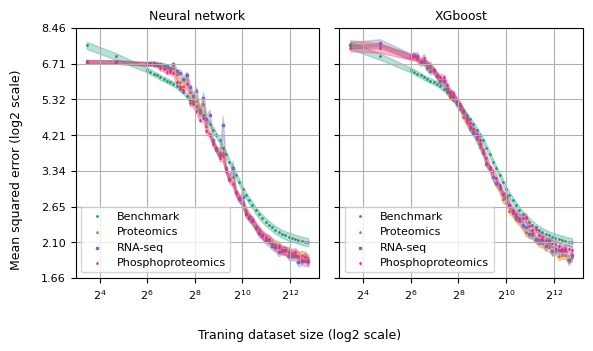

In [83]:
#plots of full LC no fits with S.E and mm benchmark
_figsize = (6, 3.5)
_fontsize = 9
fig, axs = plt.subplots(1, 2, figsize=_figsize, sharex=True, sharey=True, 
                        tight_layout=True)
labels = ['Benchmark', 'Proteomics', 'RNA-seq', 'Phosphoproteomics']
start = 2
lc_plot([mse_mm, mse_cnn_prot, mse_cnn_rna, mse_cnn_ltl], ax=axs[0], 
        start=start, labels=labels, num_gls=8, alpha=0.3, 
        m_size=1, line=False)
lc_plot([mse_mm, mse_xg_prot, mse_xg_rna, mse_xg_ltl], ax=axs[1], 
        start=start, labels=labels, num_gls=8, alpha=0.3, 
        m_size=1, line=False)


for ax in axs:
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
axs[0].set_title('Neural network', fontsize=_fontsize)
axs[1].set_title('XGboost',fontsize=_fontsize)
fig.supxlabel(_ax_labels[0], fontsize=_fontsize)
fig.supylabel(_ax_labels[1], fontsize=_fontsize)



axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


#plt.legend()
plt.savefig('Figs/Data_comp_phos_rna_intesection.png', dpi=600, bbox_inches='tight')

plt.plot()
plt.show()

In [47]:
#mm does better than one hot for the datapoint
mse_mm.mean(axis=1).iloc[-1], mse_xg_hot.mean(axis=1).iloc[-1]


(2.0992514457992053, 2.1572058888088415)

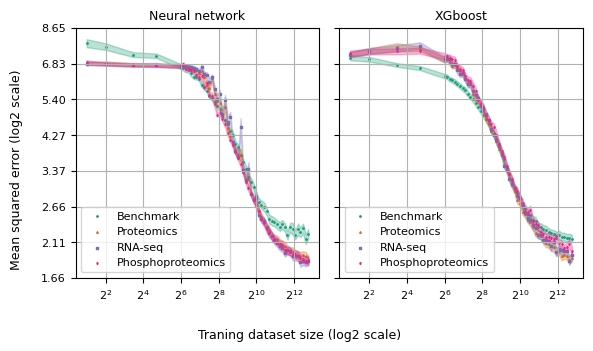

In [12]:
#plots of full LC no fits with S.E and one hot benchmark
_figsize = (6, 3.5)
_fontsize = 9
fig, axs = plt.subplots(1, 2, figsize=_figsize, sharex=True, sharey=True, 
                        tight_layout=True)
labels = ['Benchmark', 'Proteomics', 'RNA-seq', 'Phosphoproteomics']
start = 0
lc_plot([mse_cnn_hot, mse_cnn_prot, mse_cnn_rna, mse_cnn_phos2], ax=axs[0], 
        start=start, labels=labels, num_gls=8, alpha=0.3, 
        m_size=1, line=False)
lc_plot([mse_xg_hot, mse_xg_prot, mse_xg_rna, mse_xg_phos], ax=axs[1], 
        start=start, labels=labels, num_gls=8, alpha=0.3, 
        m_size=1, line=False)


for ax in axs:
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
axs[0].set_title('Neural network', fontsize=_fontsize)
axs[1].set_title('XGboost',fontsize=_fontsize)
fig.supxlabel(_ax_labels[0], fontsize=_fontsize)
fig.supylabel(_ax_labels[1], fontsize=_fontsize)



axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


#plt.legend()
#plt.savefig('Figs/Data_comp_phos_rna_intesection.png', dpi=600, bbox_inches='tight')

plt.plot()
plt.show()

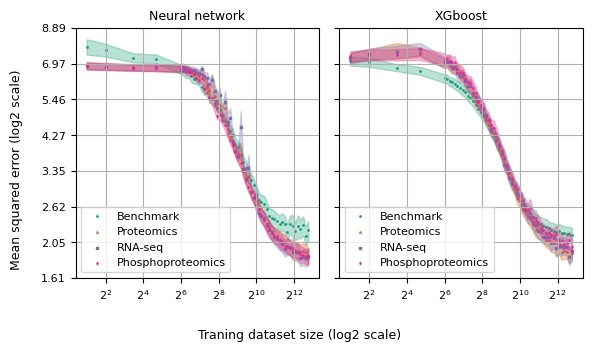

In [34]:
#plots of full LC no fits with 95% CI
_figsize = (6, 3.5)
_fontsize = 9
fig, axs = plt.subplots(1, 2, figsize=_figsize, sharex=True, sharey=True, 
                        tight_layout=True)
labels = ['Benchmark', 'Proteomics', 'RNA-seq', 'Phosphoproteomics']
start = 0
lc_plot([mse_cnn_hot, mse_cnn_prot, mse_cnn_rna, mse_cnn_phos2], ax=axs[0], 
        start=start, labels=labels, num_gls=8, alpha=0.3, 
        m_size=1, line=False)
lc_plot([mse_xg_hot, mse_xg_prot, mse_xg_rna, mse_xg_phos], ax=axs[1], 
        start=start, labels=labels, num_gls=8, alpha=0.3, 
        m_size=1, line=False)


for ax in axs:
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
axs[0].set_title('Neural network', fontsize=_fontsize)
axs[1].set_title('XGboost',fontsize=_fontsize)
fig.supxlabel(_ax_labels[0], fontsize=_fontsize)
fig.supylabel(_ax_labels[1], fontsize=_fontsize)



axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


#plt.legend()
#plt.savefig('Figs/Data_comp_phos_rna_intesection.png', dpi=600, bbox_inches='tight')

plt.plot()
plt.show()

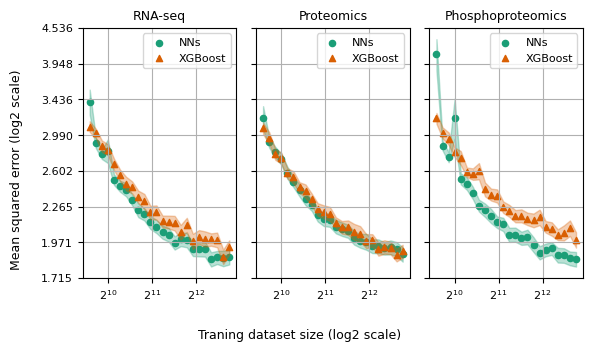

In [25]:
# full plots with fits
fig, axs = plt.subplots(1, 3, figsize=_figsize, sharex=True, sharey=True, 
                        tight_layout=True)
labels = ['NNs', 'XGBoost']
start = 30
lc_plot([mse_cnn_rna, mse_xg_rna], ax=axs[0], start=start, labels=labels, 
        num_gls=8, line=False, alpha=0.3)
lc_plot([mse_cnn_prot, mse_xg_prot], ax=axs[1], start=start, labels=labels, 
        num_gls=8, line=False, alpha=0.3)
lc_plot([mse_cnn_phos, mse_xg_phos], ax=axs[2], start=start, labels=labels, 
        num_gls=8, line=False, alpha=0.3)
for ax in axs:
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
axs[0].set_title('RNA-seq', fontsize=_fontsize)
axs[1].set_title('Proteomics',fontsize=_fontsize)
axs[2].set_title('Phosphoproteomics',fontsize=_fontsize)


fig.supxlabel(_ax_labels[0], fontsize=_fontsize)
fig.supylabel(_ax_labels[1], fontsize=_fontsize)

axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
#plt.savefig('Figs/Model_comp_phos_rna_intesection.png', dpi=600, bbox_inches='tight')

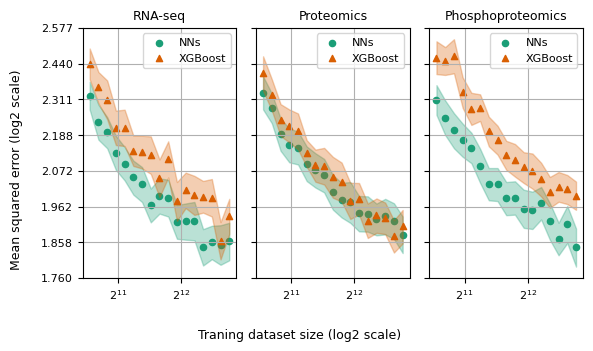

In [84]:
# full plots with fits
fig, axs = plt.subplots(1, 3, figsize=_figsize, sharex=True, sharey=True, 
                        tight_layout=True)
labels = ['NNs', 'XGBoost']
start = 37
lc_plot([mse_cnn_rna, mse_xg_rna], ax=axs[0], start=start, labels=labels, 
        num_gls=8, line=False, alpha=0.3)
lc_plot([mse_cnn_prot, mse_xg_prot], ax=axs[1], start=start, labels=labels, 
        num_gls=8, line=False, alpha=0.3)
lc_plot([mse_cnn_ltl, mse_xg_ltl], ax=axs[2], start=start, labels=labels, 
        num_gls=8, line=False, alpha=0.3)
for ax in axs:
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
axs[0].set_title('RNA-seq', fontsize=_fontsize)
axs[1].set_title('Proteomics',fontsize=_fontsize)
axs[2].set_title('Phosphoproteomics',fontsize=_fontsize)


fig.supxlabel(_ax_labels[0], fontsize=_fontsize)
fig.supylabel(_ax_labels[1], fontsize=_fontsize)

axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
plt.savefig('Figs/Model_comp_phos_rna_intesection.png', dpi=600, bbox_inches='tight')

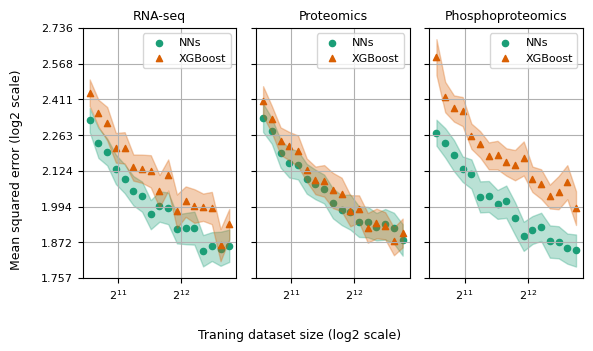

In [32]:
# full plots with fits
fig, axs = plt.subplots(1, 3, figsize=_figsize, sharex=True, sharey=True, 
                        tight_layout=True)
labels = ['NNs', 'XGBoost']
start = 37
lc_plot([mse_cnn_rna, mse_xg_rna], ax=axs[0], start=start, labels=labels, 
        num_gls=8, line=False, alpha=0.3)
lc_plot([mse_cnn_prot, mse_xg_prot], ax=axs[1], start=start, labels=labels, 
        num_gls=8, line=False, alpha=0.3)
lc_plot([mse_cnn_phos, mse_xg_phos], ax=axs[2], start=start, labels=labels, 
        num_gls=8, line=False, alpha=0.3)
for ax in axs:
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
axs[0].set_title('RNA-seq', fontsize=_fontsize)
axs[1].set_title('Proteomics',fontsize=_fontsize)
axs[2].set_title('Phosphoproteomics',fontsize=_fontsize)


fig.supxlabel(_ax_labels[0], fontsize=_fontsize)
fig.supylabel(_ax_labels[1], fontsize=_fontsize)

axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
#plt.savefig('Figs/Model_comp_phos_rna_intesection.png', dpi=600, bbox_inches='tight')


## Older plots

## xgb plots
(think only need 30/35 reps myb less extra don't reduce the err bars too much)

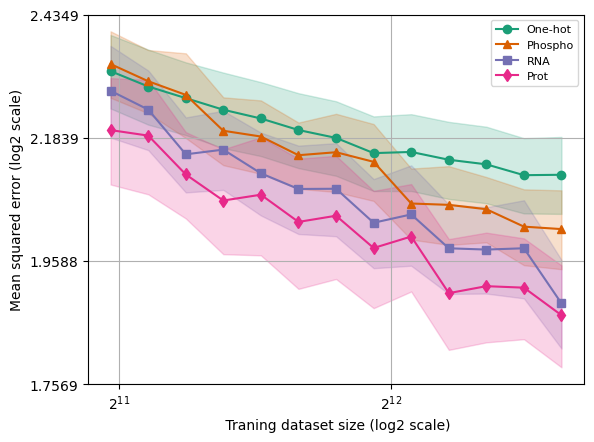

In [550]:
ax = plt.subplot()
labels = ['One-hot', 'Phospho', 'RNA', 'Prot']
lc_plot([mse_xg_hot, mse_xg_phos, mse_xg_rna, mse_xg_prot], start=40, alpha=0.2, lables=labels)
plt.show()

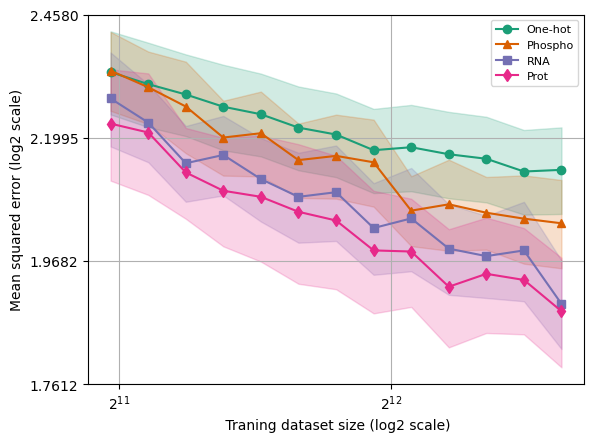

In [364]:
ax = plt.subplot()
labels = ['One-hot', 'Phospho', 'RNA', 'Prot']
lc_plot([mse_xg_hot, mse_xg_phos, mse_xg_rna, mse_xg_prot], start=40, alpha=0.2, lables=labels)
plt.show()

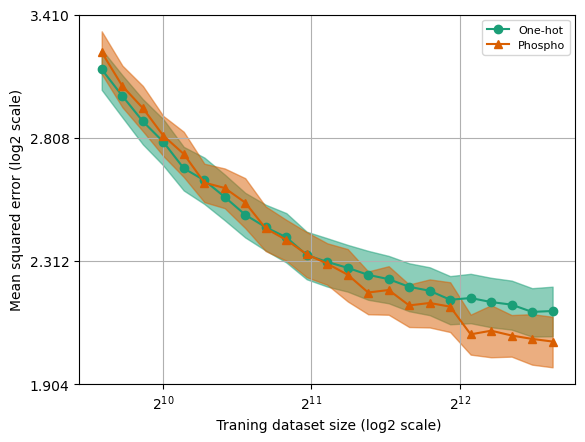

In [369]:
ax = plt.subplot()
labels = ['One-hot', 'Phospho']
lc_plot([mse_xg_hot, mse_xg_phos], start=30, lables=labels)
plt.show()

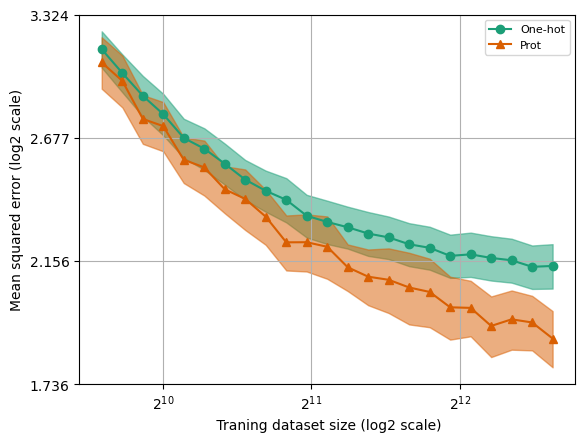

In [371]:
ax = plt.subplot()
labels = ['One-hot', 'Prot']
lc_plot([mse_xg_hot, mse_xg_prot], start=30, lables=labels)
plt.show()

## CNN plots

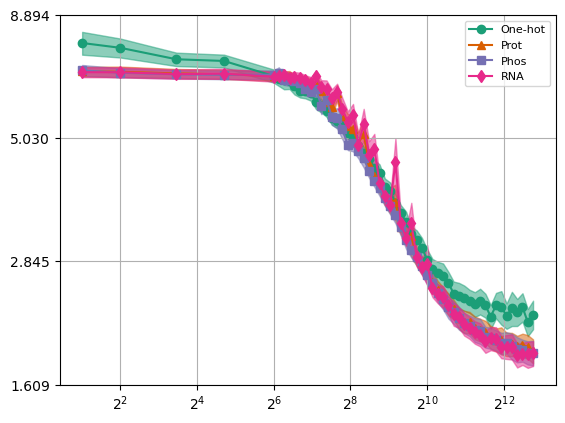

In [35]:
ax = plt.subplot()
lb = ['One-hot', 'Prot', 'Phos', 'RNA']
lc_plot([mse_cnn_hot, mse_cnn_prot, mse_cnn_phos2, mse_cnn_rna], ax=ax, start=0, labels=lb)
plt.show()

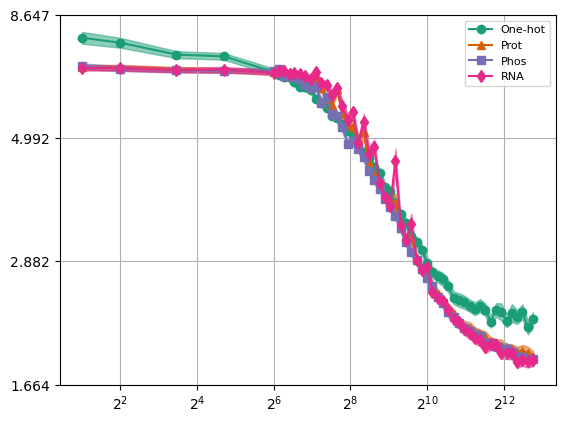

In [171]:
ax = plt.subplot()
lb = ['One-hot', 'Prot', 'Phos', 'RNA']
lc_plot([mse_cnn_hot, mse_cnn_prot, mse_cnn_phos2, mse_cnn_rna], ax=ax, start=0, labels=lb)
plt.show()

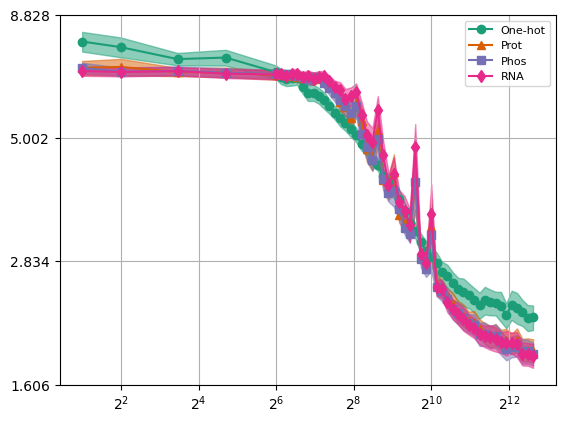

In [562]:
ax = plt.subplot()
lb = ['One-hot', 'Prot', 'Phos', 'RNA']
lc_plot([mse_cnn_hot, mse_cnn_prot, mse_cnn_phos, mse_cnn_rna], ax=ax, start=0, labels=lb)
plt.show()

## Finding out hwhy the spikes apper 
happens when traning size is a little bit bigger than a multiple of the batch size. Then the final batch will only have 1 or 2 traning examples in so if an outlier will cause the network to 

In [21]:
mse_cnn_phos2

,run0,run1,run2,run3,run4,run5,run6,run7,run8,run9,...,run20,run21,run22,run23,run24,run25,run26,run27,run28,run29
train size,,,,,,,,,,,,,,,,,,,,,
2,6.557663,6.920745,6.706521,7.430865,6.214909,6.711999,6.528841,6.876072,7.616072,6.925515,...,8.596812,7.510245,6.737569,6.632364,6.749872,6.852514,6.489091,6.754112,6.958965,6.583191
4,6.737683,6.790129,6.306206,7.477986,6.126779,6.753236,6.954763,6.476890,7.388504,7.093761,...,6.914377,7.367713,6.604009,6.726492,6.776895,6.926657,6.537124,6.915061,6.759480,6.692156
11,6.796208,6.981430,6.497747,7.424044,6.155916,6.729720,6.651908,6.595748,7.463351,7.164177,...,6.876427,7.425504,6.625667,6.467390,6.746480,6.783115,6.523886,6.473925,7.075719,6.595245
26,6.674170,6.736190,6.812321,7.354617,6.230634,6.709447,6.511553,6.490655,7.482203,7.055096,...,6.729115,7.214416,6.588234,6.550440,6.752929,6.832048,6.530088,6.387457,6.787064,6.625027
64,6.469702,6.724153,6.621511,7.274771,6.115550,6.775460,6.447103,6.556445,7.242357,6.938056,...,6.681800,7.260463,6.605627,6.447117,6.707474,6.491899,6.533158,6.287618,6.731254,6.726401
70,6.706071,6.770772,6.495676,7.256578,6.052377,6.714986,6.608578,6.768130,7.214899,7.045372,...,6.451176,7.280081,6.585222,6.717454,6.821509,6.732056,6.459590,6.297636,6.778612,6.717238
77,6.598277,6.707437,6.654434,7.385548,6.117356,6.686849,7.036401,6.931015,7.291143,7.139060,...,6.727919,7.308684,6.478891,6.844212,6.738700,6.957395,6.431438,5.836712,6.885148,6.658985
85,6.628068,6.254783,6.560290,7.284093,6.065946,6.718260,6.713720,7.058392,7.216348,6.984486,...,6.607794,7.338887,6.519620,6.705346,6.792493,6.820885,6.409816,6.522744,6.803213,6.678772
93,6.579507,6.718344,6.391834,7.367200,6.085962,6.728171,6.016707,6.932983,6.919355,7.124675,...,6.639355,7.213150,6.550274,6.525192,6.658324,6.542213,6.377419,6.535816,6.896585,6.657859


In [23]:
2**10

1024

In [24]:
32

256

In [12]:
cols_temp

Index(['run0', 'run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8',
       'run9', 'run10', 'run11', 'run12', 'run13', 'run14', 'run15', 'run16',
       'run17', 'run18', 'run19', 'run20', 'run21', 'run22', 'run23', 'run24',
       'run25', 'run26', 'run27', 'run28', 'run29'],
      dtype='object')

In [17]:
2**8

256

In [34]:
mse_cnn_phos2

,run0,run1,run2,run3,run4,run5,run6,run7,run8,run9,...,run15,run16,run17,run18,run19,run20,run21,run22,run23,run24
train size,,,,,,,,,,,,,,,,,,,,,
2,6.684844,6.847897,7.473949,7.401588,6.250983,6.745498,6.574688,6.845019,8.384098,7.136418,...,6.838168,6.468798,6.571503,6.196551,7.289232,6.718484,7.579555,6.695092,6.560087,6.753705
4,6.771413,6.816067,7.058305,7.388136,6.212132,6.763406,6.716676,6.470800,7.372780,7.260437,...,6.813285,6.605415,6.522054,6.093914,6.965128,6.705661,7.421913,6.650555,6.647532,6.780208
11,6.794720,6.753154,6.735329,7.337014,6.200237,6.625736,7.134233,6.689547,7.341087,7.032750,...,6.634277,6.454041,6.422440,6.156784,6.717881,6.808577,7.370528,6.623304,6.929154,6.714629
26,6.633295,6.752969,6.926594,7.208255,6.090524,6.689490,6.514913,6.553238,7.502948,7.007943,...,7.121493,6.699232,6.414709,6.123169,6.790743,6.791951,7.359301,6.670310,6.751935,6.806627
64,6.766604,6.677497,6.624793,7.284364,6.065467,6.620641,6.670657,6.581845,7.443740,7.085925,...,6.822300,6.624371,6.412470,6.151087,7.020164,6.698530,7.272988,6.647326,6.848702,6.875577
70,6.747139,6.813726,6.453848,7.325780,6.113929,6.673538,8.616615,7.180001,7.500585,6.963667,...,6.921444,6.538791,6.389829,6.248371,6.850796,6.556880,7.183979,6.565696,6.670894,7.034278
77,6.616495,6.763262,6.627349,6.764863,6.072466,6.917141,7.203354,6.788951,7.321595,7.059056,...,6.685064,6.154740,6.409275,6.195340,6.271950,6.688934,7.256452,6.403925,6.564005,6.824624
85,6.780057,6.596602,5.892219,7.240978,6.139360,6.681020,6.883579,6.883054,7.314614,7.122179,...,6.653271,6.568497,6.388786,6.115133,6.891538,6.774088,7.191712,6.436831,6.609290,6.793643
93,6.868947,6.109187,6.495596,7.252567,6.031713,6.660993,6.594462,7.016637,7.339591,7.226256,...,6.769409,6.724385,6.352397,6.003213,6.137563,6.595455,7.215872,6.424869,6.528494,6.329054


In [24]:
mse_cnn_phos2.index

Int64Index([   2,    4,   11,   26,   64,   70,   77,   85,   93,  103,  113,
             125,  137,  151,  166,  183,  201,  221,  244,  268,  295,  325,
             358,  394,  433,  477,  525,  577,  635,  699,  769,  847,  932,
            1025, 1128, 1242, 1366, 1503, 1654, 1821, 2003, 2205, 2426, 2669,
            2937, 3232, 3557, 3914, 4307, 4740, 5215, 5739, 6315, 6949],
           dtype='int64', name='train size')

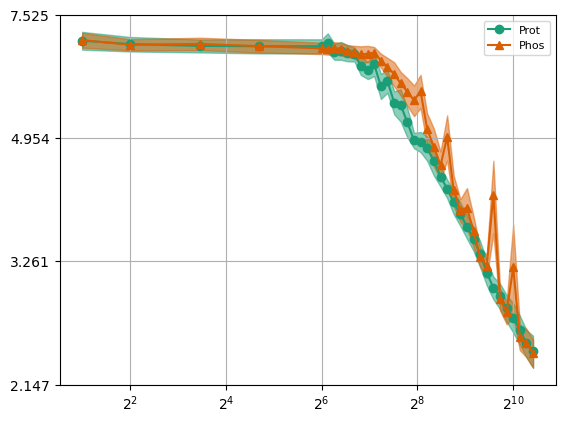

In [33]:
#using batch size of 64 fixes spiking problem. 
ax = plt.subplot()
lb =  ['Prot', 'Phos', 'RNA']
#cols_temp = mse_cnn_hot.columns
lc_plot([mse_cnn_phos2, mse_cnn_phos[cols_temp]], ax=ax, start=0, end=-17, labels=lb)
plt.show()

In [22]:
2**8 / 64

4.0

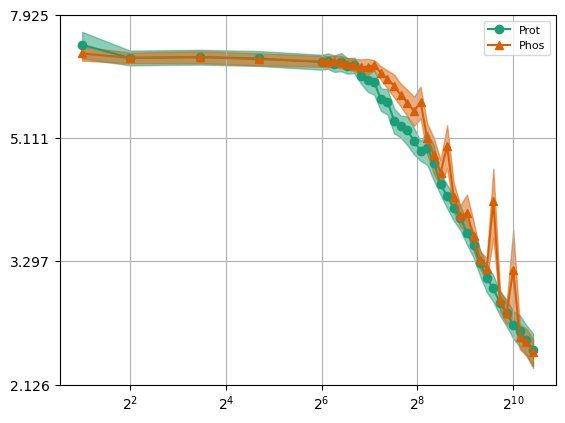

In [16]:
#outlier points not shared between all data sets if only look at the first 10 runs
#shows not the falt of adding a given traning example
ax = plt.subplot()
lb =  ['Prot', 'Phos', 'RNA']
#cols_temp = mse_cnn_hot.columns
lc_plot([mse_cnn_phos2, mse_cnn_phos[cols_temp]], ax=ax, start=0, end=-17, labels=lb)
plt.show()

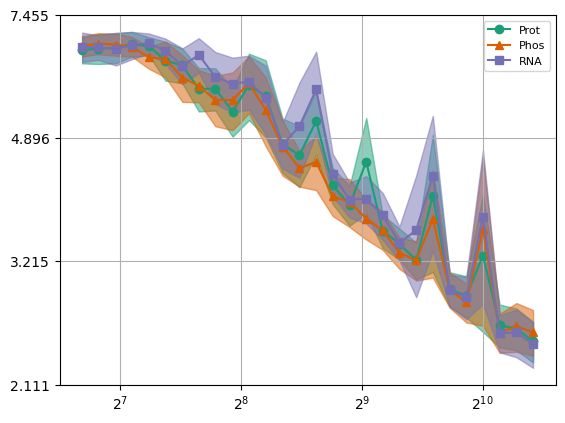

In [523]:
#outlier points not shared between all data sets if only look at the first 10 runs
#shows not the falt of adding a given traning example
ax = plt.subplot()
lb =  ['Prot', 'Phos', 'RNA']
cols_temp = mse_cnn_hot.columns[:10]
lc_plot([mse_cnn_prot[cols_temp], mse_cnn_phos[cols_temp], mse_cnn_rna[cols_temp]], ax=ax, start=9, end=-17, labels=lb)
plt.show()

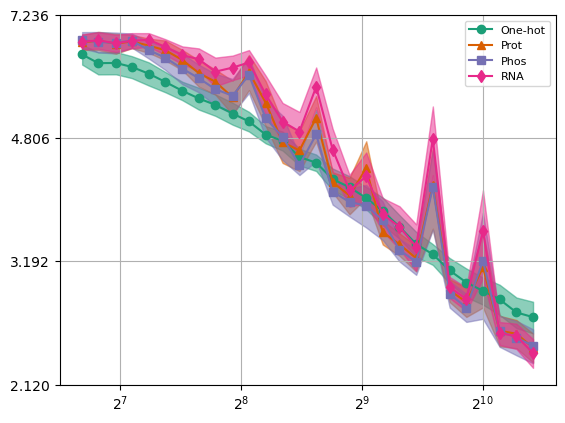

In [524]:
ax = plt.subplot()
lb =  ['One-hot', 'Prot', 'Phos', 'RNA']
lc_plot([mse_cnn_hot, mse_cnn_prot, mse_cnn_phos, mse_cnn_rna], ax=ax, start=9, end=-17, labels=lb)
plt.show()

In [529]:
2**8

256

In [528]:
expected = 128 * np.arange(9) + 1 
expected

array([   1,  129,  257,  385,  513,  641,  769,  897, 1025])

In [530]:
mse_cnn_rna.mean(axis=1)

train size
2       6.819130
4       6.791774
11      6.817322
26      6.739567
64      6.713427
70      6.726878
77      6.667345
85      6.724907
93      6.723031
103     6.624665
113     6.651406
125     6.589040
137     6.646826
151     6.663447
166     6.508654
183     6.332862
201     6.248416
221     5.995858
244     6.076822
268     6.181267
295     5.557804
325     5.079270
358     4.914217
394     5.702023
433     4.629081
477     4.040863
525     4.235447
577     3.734546
635     3.580139
699     3.352722
769     4.795531
847     2.929298
932     2.817678
1025    3.531193
1128    2.514456
1242    2.491367
1366    2.353988
1503    2.278585
1654    2.228112
1821    2.173556
2003    2.119308
2205    2.086083
2426    2.030413
2669    2.007442
2937    2.000219
3232    1.981744
3557    1.953218
3914    1.946276
4307    1.949444
4740    1.933848
5215    1.853446
5739    1.850090
6315    1.835536
6949    1.841561
dtype: float64

In [531]:
mse_cnn_rna.std(axis=1)

train size
2       0.409129
4       0.389545
11      0.370137
26      0.381249
64      0.428812
70      0.383615
77      0.453084
85      0.434649
93      0.462969
103     0.458992
113     0.508940
125     0.528659
137     0.469143
151     0.421851
166     0.474565
183     0.524118
201     0.640657
221     0.800081
244     0.691797
268     0.728195
295     1.003327
325     0.906163
358     0.923036
394     1.055898
433     0.925185
477     0.597562
525     0.976452
577     0.575879
635     0.710962
699     0.721407
769     1.525857
847     0.287152
932     0.306854
1025    1.434810
1128    0.266609
1242    0.293132
1366    0.314355
1503    0.292580
1654    0.302182
1821    0.319073
2003    0.269962
2205    0.269084
2426    0.267940
2669    0.278390
2937    0.318109
3232    0.311225
3557    0.260698
3914    0.307543
4307    0.262132
4740    0.314933
5215    0.277071
5739    0.271882
6315    0.280134
6949    0.283698
dtype: float64

In [ ]:
33,16,96,192,0.001
33,24,32,160,0.0001


In [507]:
mse_cnn_rna.loc[1025]

run0     3.468571
run1     2.628518
run2     3.933146
run3     3.497493
run4     2.465490
run5     6.452066
run6     2.427845
run7     2.972541
run8     2.962652
run9     6.627364
run10    2.557785
run11    2.292856
run12    2.287447
run13    2.993519
run14    3.496186
run15    3.020483
run16    2.818653
run17    6.033399
run18    2.351258
run19    2.901612
run20    6.100237
run21    5.976183
run22    2.863364
run23    2.906634
run24    2.813666
run25    2.363889
run26    3.002230
run27    6.282418
run28    2.814776
run29    2.623508
Name: 1025, dtype: float64

In [506]:
128*8

1024

In [497]:
2**8

256

In [ ]:
obsered_res_points = 

In [478]:
mse_cnn_rna.std(axis=1)

train size
2       0.409129
4       0.389545
11      0.370137
26      0.381249
64      0.428812
70      0.383615
77      0.453084
85      0.434649
93      0.462969
103     0.458992
113     0.508940
125     0.528659
137     0.469143
151     0.421851
166     0.474565
183     0.524118
201     0.640657
221     0.800081
244     0.691797
268     0.728195
295     1.003327
325     0.906163
358     0.923036
394     1.055898
433     0.925185
477     0.597562
525     0.976452
577     0.575879
635     0.710962
699     0.721407
769     1.525857
847     0.287152
932     0.306854
1025    1.434810
1128    0.266609
1242    0.293132
1366    0.314355
1503    0.292580
1654    0.302182
1821    0.319073
2003    0.269962
2205    0.269084
2426    0.267940
2669    0.278390
2937    0.318109
3232    0.311225
3557    0.260698
3914    0.307543
4307    0.262132
4740    0.314933
5215    0.277071
5739    0.271882
6315    0.280134
6949    0.283698
dtype: float64

In [479]:
128*2

256

In [474]:
res_points = np.arange(10) * 128 + 1
res_points

array([   1,  129,  257,  385,  513,  641,  769,  897, 1025, 1153])

In [475]:
for r in res_points:
    if r in mse_cnn_rna.index:
        print(mse_cnn_rna.loc[r].std())
    
    

1.5258568607984189
1.43481019966117


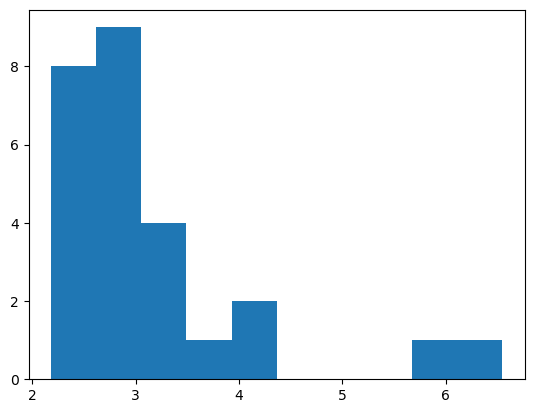

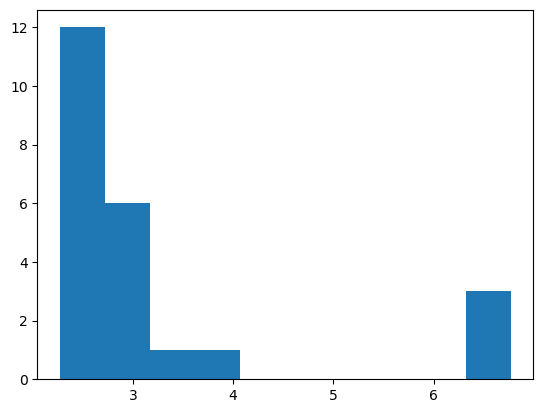

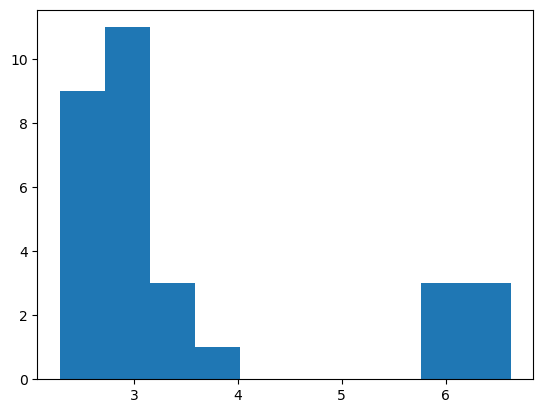

In [406]:
plt.hist(mse_cnn_prot.loc[1025])
plt.show()
plt.hist(mse_cnn_phos.loc[1025])
plt.show()
plt.hist(mse_cnn_rna.loc[1025])
plt.show()

In [410]:
def find_outler(series, outler_val):
    mask = series > outler_val
    return series[mask]

In [418]:
find_outler(mse_cnn_rna.loc[1025], 4)

run5     6.452066
run9     6.627364
run17    6.033399
run20    6.100237
run21    5.976183
run27    6.282418
Name: 1025, dtype: float64

In [419]:
find_outler(mse_cnn_prot.loc[1025], 4)

run0     6.546982
run10    5.797000
run21    4.078301
Name: 1025, dtype: float64

In [420]:
find_outler(mse_cnn_phos.loc[1025], 4)

run0     6.383228
run9     6.770855
run15    6.388932
Name: 1025, dtype: float64

In [451]:
region = [847, 932, 1025]
region.extend(list(mse_cnn_rna.index[34: ]))
def find_outler_in_range(series, outler_val=4, train_sizes=region):
    for ts in train_sizes:
        outlers = find_outler(series.loc[ts], 4)
        if len(outlers) > 0:
            print(f'test size {ts}')
            print(outlers)
            print('---------')

In [452]:
find_outler_in_range(mse_cnn_prot)

test size 1025
run0     6.546982
run10    5.797000
run21    4.078301
Name: 1025, dtype: float64
---------


In [453]:
find_outler_in_range(mse_cnn_phos)

test size 1025
run0     6.383228
run9     6.770855
run15    6.388932
Name: 1025, dtype: float64
---------


In [454]:
find_outler_in_range(mse_cnn_rna)

test size 1025
run5     6.452066
run9     6.627364
run17    6.033399
run20    6.100237
run21    5.976183
run27    6.282418
Name: 1025, dtype: float64
---------


In [400]:
mse_cnn_prot.loc[1025].std()

1.0197713681362335

In [401]:
mse_cnn_phos.loc[1025].std()

1.3647916777189812

In [402]:
mse_cnn_rna.loc[1025].std()

1.43481019966117

In [403]:
mse_cnn_rna.loc[932].std()

0.30685372245348336

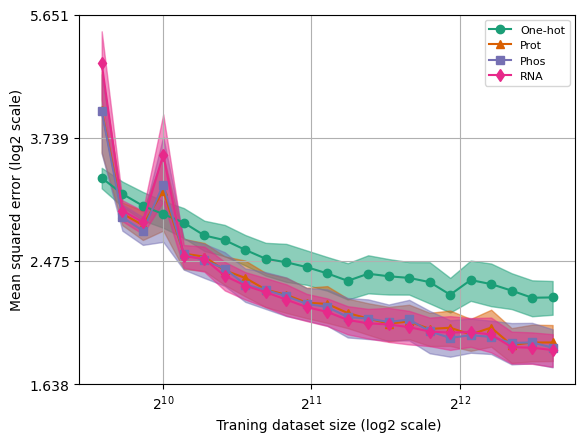

In [350]:
ax = plt.subplot()
lb = ['One-hot', 'Prot', 'Phos', 'RNA']
lc_plot([mse_cnn_hot, mse_cnn_prot, mse_cnn_phos, mse_cnn_rna], start=30, lables=lb)
plt.show()

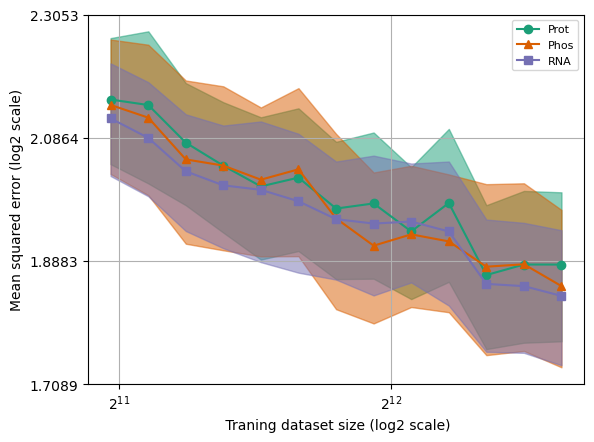

In [374]:
ax = plt.subplot()
lb = ['Prot', 'Phos', 'RNA']
lc_plot([mse_cnn_prot, mse_cnn_phos, mse_cnn_rna], start=40, lables=lb)
plt.show()

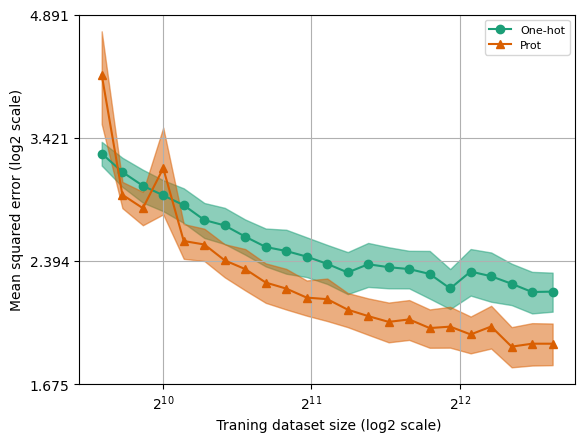

In [351]:
ax = plt.subplot()
lb = ['One-hot', 'Prot']
lc_plot([mse_cnn_hot, mse_cnn_prot], start=30, lables=lb)
plt.show()

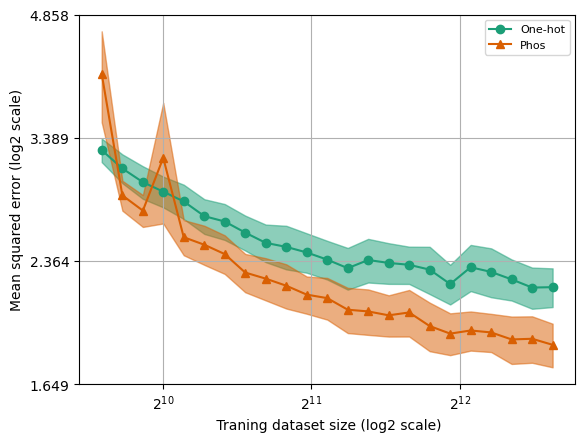

In [352]:
ax = plt.subplot()
lb = ['One-hot', 'Phos']
lc_plot([mse_cnn_hot, mse_cnn_phos], start=30, lables=lb)
plt.show()

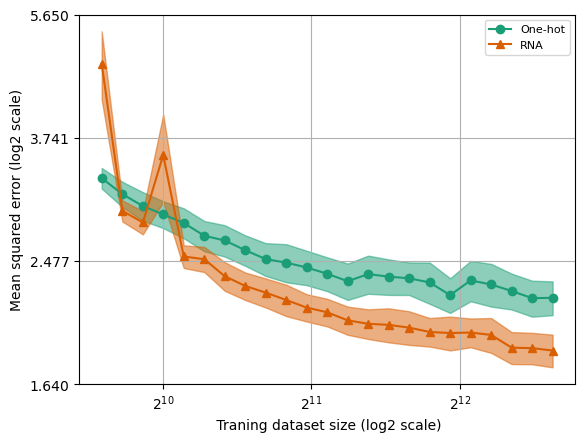

In [353]:
ax = plt.subplot()
lb = ['One-hot', 'RNA']
lc_plot([mse_cnn_hot, mse_cnn_rna], start=30, lables=lb)
plt.show()

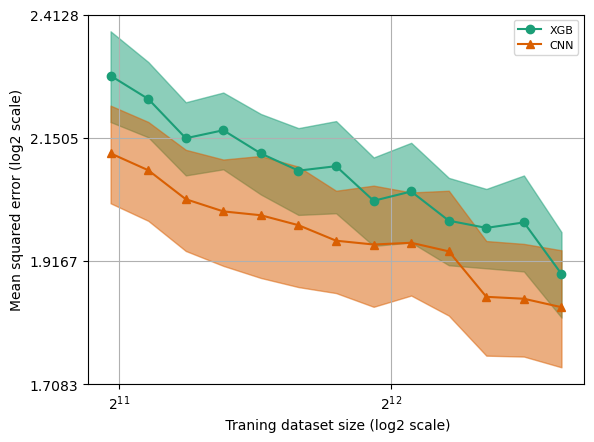

In [354]:
ax = plt.subplot()
lb = ['XGB', 'CNN']
lc_plot([mse_xg_rna, mse_cnn_rna], start=40, lables=lb)
plt.show()

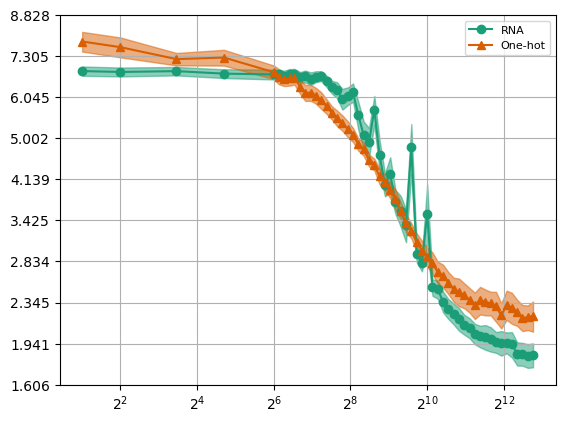

In [355]:
ax = plt.subplot()
start = 0
end = len(mse_xg_rna)
ys = [mse_cnn_rna.mean(axis=1)[start: end], mse_cnn_hot.mean(axis=1)[start: end]]
stand_err = [mse_cnn_rna.std(axis=1)[start: end] / len(mse_cnn_rna.T) ** 0.5, 
             mse_cnn_hot.std(axis=1)[start: end] / len(mse_cnn_hot.T) ** 0.5]
stand_err = np.array(stand_err) * 1.96
labels = ['RNA', 'One-hot']
x = mse_xg_rna.index[start: end]
plot_nb.multi_lines_scatter(x=x, ys=ys, ax=ax, scale='log',
                                  num_grid_lines=10, errors=stand_err, 
                                  labels=labels)
ax.yaxis.set_major_formatter(plt.ScalarFormatter())


## CNN vs xgb

In [356]:
import matplotlib.pyplot as plt

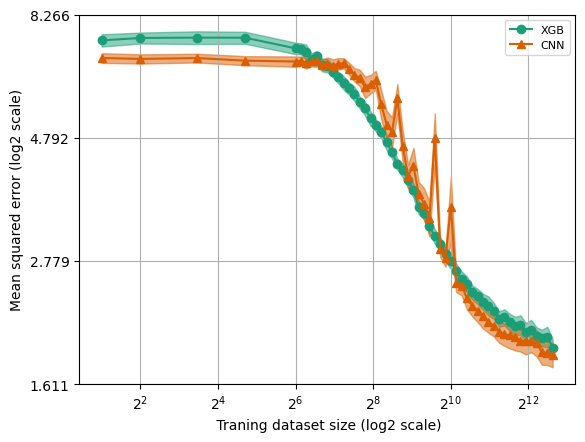

In [357]:
ax = plt.subplot()
lb = ['XGB', 'CNN']
lc_plot([mse_xg_rna, mse_cnn_rna], start=0, lables=lb)
plt.show()

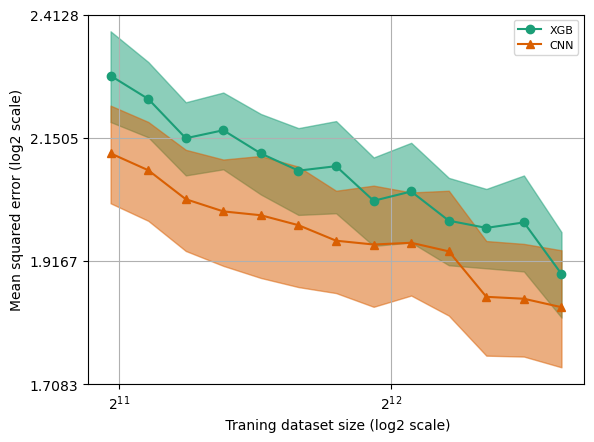

In [358]:
ax = plt.subplot()
lb = ['XGB', 'CNN']
lc_plot([mse_xg_rna, mse_cnn_rna], start=40, lables=lb)
plt.show()

## Dark mode plotting

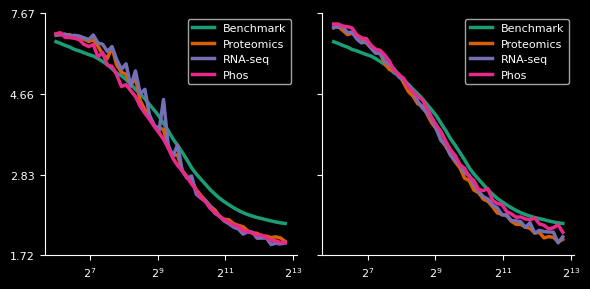

In [16]:
nn_dfs = [mse_mm, mse_cnn_prot, mse_cnn_rna, mse_cnn_phos2]
xg_dfs = [mse_mm, mse_xg_prot, mse_xg_rna, mse_xg_phos]
labels = ['Benchmark', 'Proteomics', 'RNA-seq', 'Phos']
start = 4
end = None

plt.style.use('dark_background')
fig, axs = plt.subplots(1, 2, figsize=_figsize, sharex=True, sharey=True, 
                        tight_layout=True)
x = nn_dfs[0].index[start: end]
y_nn = [df.mean(axis=1)[start: end] for df in nn_dfs]
y_xg = [df.mean(axis=1)[start: end] for df in xg_dfs]

for ax in axs:
    #ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
    # Hide the right and top spines
    ax.spines[['right', 'top']].set_visible(False)
#axs[0].set_title('Neural network', fontsize=_fontsize)
#axs[1].set_title('XGboost',fontsize=_fontsize)
#fig.supxlabel(_ax_labels[0], fontsize=_fontsize)
#fig.supylabel(_ax_labels[1], fontsize=_fontsize)

plot_nb.multi_lines_scatter(x=x, ys=y_nn, ax=axs[0], labels=labels, 
                            scale='log', show_markers=False, 
                            linewidth=2.5, num_grid_lines=4, update_xticks=False)

plot_nb.multi_lines_scatter(x=x, ys=y_xg, ax=axs[1], labels=labels, 
                            scale='log', show_markers=False, 
                            linewidth=2.5, num_grid_lines=4, 
                            update_xticks=False)
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#plt.savefig('Poster_line.png', dpi=1000, bbox_inches='tight')

## Tables

In [92]:
def extract_spear(df, train_set_size_ind=-1):
    vals = []
    for run in  df.iloc[train_set_size_ind]:
        val = float(run.split(',')[0].split('(')[1])
        vals.append(val)
    return np.array(vals)

In [71]:
reps = 30
mse_xg_rna.iloc[-1].mean(axis=0), mse_xg_rna.iloc[-1].std(axis=0) / (reps ** 0.5)

(1.9335211001188561, 0.05173020535156629)

In [ ]:
'1.93(5)'

In [18]:
mse_xg_prot.iloc[-1].mean(axis=0), mse_xg_prot.iloc[-1].std(axis=0) / (reps ** 0.5)

(1.9033095882468627, 0.04849915650271851)

In [ ]:
'1.90(5)'

In [72]:
mse_xg_ltl.iloc[-1].mean(axis=0), mse_xg_ltl.iloc[-1].std(axis=0) / (reps ** 0.5)

(1.9952330699640688, 0.04291638260132684)

In [ ]:
'2.00(4)'

In [19]:
mse_xg_phos.iloc[-1].mean(axis=0), mse_xg_phos.iloc[-1].std(axis=0) / (reps ** 0.5)

(1.9892285479765386, 0.05953368388764961)

In [ ]:
'1.99(6)'

In [20]:
mse_cnn_rna.iloc[-1].mean(axis=0), mse_cnn_rna.iloc[-1].std(axis=0) / (reps ** 0.5)

(1.8608589231284454, 0.05324485042480901)

In [ ]:
'1.86(5)'

In [21]:
mse_cnn_prot.iloc[-1].mean(axis=0), mse_cnn_prot.iloc[-1].std(axis=0) / (reps ** 0.5)

(1.8800975618584572, 0.05229997053962444)

In [ ]:
'1.88(5)'

In [73]:
mse_cnn_ltl.iloc[-1].mean(axis=0), mse_cnn_ltl.iloc[-1].std(axis=0) / (reps ** 0.5)

(1.8438847480277725, 0.05353739213555456)

In [ ]:
'1.84(5)'

In [74]:
mse_cnn_phos2.iloc[-1].mean(axis=0), mse_cnn_phos2.iloc[-1].std(axis=0) / (reps ** 0.5)

(1.8653549315947608, 0.05298161009555654)

In [ ]:
'1.85(5)'

In [16]:
mse_mm.iloc[-1].mean(axis=0), mse_mm.iloc[-1].std(axis=0) / (reps ** 0.5)

(2.0992514457992053, 0.05603098353702007)

In [79]:
table_mse = {'XGBoost': [], 'Neural Network': []}
table_mse['XGBoost'].append('1.93(5)')
table_mse['XGBoost'].append('1.90(5)')
table_mse['XGBoost'].append('2.00(4)')
table_mse['Neural Network'].append('1.86(5)')
table_mse['Neural Network'].append('1.88(5)')
table_mse['Neural Network'].append('1.84(5)')
table_mse = pd.DataFrame(table_mse, index=['RNA-seq', 'Proteomics', 'Phosphoproteomics'])
table_mse

,XGBoost,Neural Network
RNA-seq,1.93(5),1.86(5)
Proteomics,1.90(5),1.88(5)
Phosphoproteomics,2.00(4),1.84(5)


In [25]:
 table_mse.to_csv('Figs/rpp_mse.csv')

In [85]:
r2_cnn_ltl.iloc[-1].mean(axis=0), r2_cnn_ltl.iloc[-1].std(axis=0) / (reps ** 0.5)

(0.7260905151231788, 0.007676122225649822)

In [86]:
r2_cnn_rna.iloc[-1].mean(axis=0), r2_cnn_rna.iloc[-1].std(axis=0) / (reps ** 0.5)

(0.7234075259901988, 0.007876853503699377)

In [87]:
r2_cnn_prot.iloc[-1].mean(axis=0), r2_cnn_prot.iloc[-1].std(axis=0) / (reps ** 0.5)

(0.7209655222648532, 0.007010663040449865)

In [98]:
extract_spear(rho_cnn_prot).mean(), extract_spear(rho_cnn_ltl).mean(), extract_spear(rho_cnn_rna).mean()

(0.858815066545198, 0.8615124489149832, 0.859694794707922)

In [99]:
extract_spear(rho_cnn_prot).std(), extract_spear(rho_cnn_ltl).std(), extract_spear(rho_cnn_rna).std()

(0.018027474491103004, 0.018311501404895663, 0.02005218685804529)

## Variation anylsis

<BarContainer object of 30 artists>

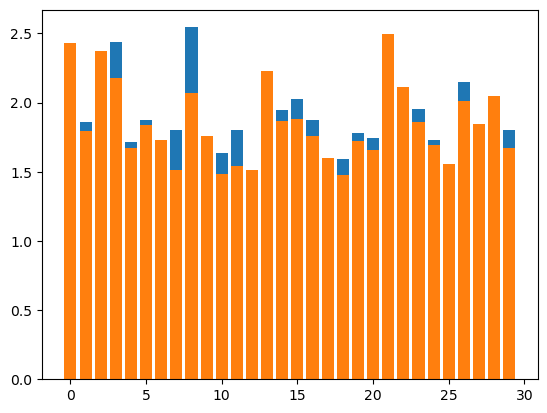

In [76]:
x = np.arange(len(mse_cnn_prot.T))
plt.bar(x, mse_cnn_prot.iloc[-1])
plt.bar(x, mse_cnn_phos.iloc[-1])

In [50]:
def ave_ranking(results1, results2, metric='mse'):
    '''comp where r1 is better than r2
    '''
    results1.index = range(len(results1))
    results2.index = range(len(results2))
    #mse lower better
    diff = results1 - results2
    if metric == 'mse':
        r1_mask = diff < 0
        r2_mask = diff > 0 
        num_r1_top = np.sum(r1_mask)
        # %improvement of r1 relative to r2 for r1s that are better than r2
        r1_per_improve = (1 - results1[r1_mask] / results2[r1_mask]) * 100
        r2_per_improve = (1 - results1[r2_mask] / results2[r2_mask]) * 100
        
    #other metircs higher better   
    else:
        r1_mask = diff > 0
        r2_mask = diff < 0 
        num_r1_top = np.sum(r1_mask)
        # %improvement of r1 relative to r2 for r1s that are better than r2
        r1_per_improve = (results1[r1_mask] / results2[r1_mask] - 1) * 100
        r2_per_improve = (results1[r2_mask] / results2[r2_mask] - 1) * 100
        
    print(num_r1_top)
    
    return r1_per_improve, r2_per_improve,   num_r1_top
    

## Phos comparisons

## MSE plot

In [112]:
axs[0,0]

<AxesSubplot:>

In [40]:
def multi_mean_ranking(df): 
    
    rankings = {}
    for d_type in df.columns:
        rankings[d_type] = []
    for _, row in df.iterrows():
        row = row.sort_values(ascending=True)
        for d_type in df.columns:
            rank = np.where(row.index==d_type)[0][0]
            rankings[d_type].append(rank + 1)
    rankings_df = pd.DataFrame(
        [np.mean(rankings[d_type]) for d_type in df.columns])
    rankings_df.index = df.columns
    
    
    
    return rankings_df

In [81]:
df = pd.DataFrame((mse_xg_rna.iloc[-1], mse_xg_prot.iloc[-1], 
                   mse_xg_ltl.iloc[-1]), index=['rna', 'prot', 'phos']).T
multi_mean_ranking(df)

,0
rna,1.800000
prot,1.733333
phos,2.466667


In [82]:
df = pd.DataFrame((mse_cnn_ltl.iloc[-1], mse_cnn_rna.iloc[-1], mse_cnn_prot.iloc[-1]), 
                  index=['phos', 'rna', 'prot']).T
multi_mean_ranking(df)

,0
phos,1.966667
rna,1.800000
prot,2.233333


In [44]:
df = pd.DataFrame((mse_cnn_ltl.iloc[-1], mse_cnn_rna.iloc[-1]), 
                  index=['phos', 'rna']).T
multi_mean_ranking(df)

,0
phos,1.566667
rna,1.433333


In [45]:
df = pd.DataFrame((mse_cnn_rna.iloc[-1], mse_cnn_prot.iloc[-1]), 
                  index=['rna', 'prot']).T
multi_mean_ranking(df)

,0
rna,1.366667
prot,1.633333


In [46]:
df = pd.DataFrame((mse_cnn_ltl.iloc[-1], mse_cnn_prot.iloc[-1]), 
                  index=['phos', 'prot']).T
multi_mean_ranking(df)

,0
phos,1.4
prot,1.6


## XG

In [65]:
df = pd.DataFrame((mse_xg_ltl.iloc[-1], mse_xg_rna.iloc[-1]), 
                  index=['phos', 'rna']).T
multi_mean_ranking(df)

,0
phos,1.7
rna,1.3


In [161]:
df = pd.DataFrame((mse_xg_rna.iloc[-1], mse_xg_prot.iloc[-1]), 
                  index=['rna', 'prot']).T
multi_mean_ranking(df)

,0
rna,1.5
prot,1.5


In [66]:
df = pd.DataFrame((mse_xg_ltl.iloc[-1], mse_xg_prot.iloc[-1]), 
                  index=['phos', 'prot']).T
multi_mean_ranking(df)

,0
phos,1.766667
prot,1.233333


9
13
7
18


AttributeError: 'numpy.ndarray' object has no attribute 'get_legend_handles_labels'

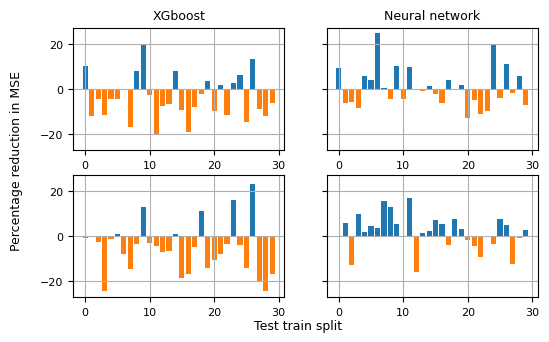

In [67]:
_figsize = (6, 3.5)
_fontsize = 9

fig, axs = plt.subplots(2, 2, figsize=_figsize, sharey=True)

phos_imp, rna_imp, _ = ave_ranking(mse_xg_ltl.iloc[-1], mse_xg_rna.iloc[-1])
axs[0, 0].bar(phos_imp.index, phos_imp, label='Phos lower MSE')
axs[0, 0].bar(rna_imp.index, rna_imp, label='RNA lower MSE')
#axs[0, 0].set_ylabel('Percentage reduction in MSE')

rna_imp, xg_imp, _ = ave_ranking(mse_cnn_ltl.iloc[-1], mse_cnn_rna.iloc[-1])
axs[0, 1].bar(rna_imp.index, rna_imp)
axs[0, 1].bar(xg_imp.index, xg_imp,)



phos_imp, rna_imp, _ = ave_ranking(mse_xg_ltl.iloc[-1], mse_xg_prot.iloc[-1])
axs[1, 0].bar(phos_imp.index, phos_imp, label='Phos lower MSE')
axs[1, 0].bar(rna_imp.index, rna_imp, label='RNA lower MSE')

rna_imp, xg_imp, _ = ave_ranking(mse_cnn_ltl.iloc[-1], mse_cnn_prot.iloc[-1])
axs[1, 1].bar(rna_imp.index, rna_imp)
axs[1, 1].bar(xg_imp.index, xg_imp,)

for ax_row in axs:
    for ax in ax_row:
        ax.grid(True)
        ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
axs[0, 0].set_title('XGboost',fontsize=_fontsize)
axs[0, 1].set_title('Neural network', fontsize=_fontsize)

fig.supxlabel('Test train split', fontsize=_fontsize)
fig.supylabel('Percentage reduction in MSE', fontsize=_fontsize)
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles, labels,loc='upper left',  fontsize=_fontsize - 2)
plt.show()

15
18
19


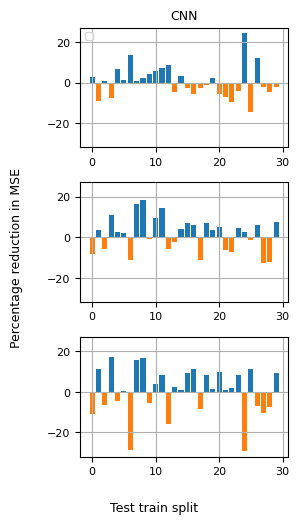

In [154]:
_figsize = (3, (3.5 * 1.5)) 
_fontsize = 9

fig, axs = plt.subplots(3, figsize=_figsize, sharey=True, layout='tight')


rna_imp, xg_imp, _ = ave_ranking(mse_cnn_phos.iloc[-1], mse_cnn_rna.iloc[-1])
axs[0].bar(rna_imp.index, rna_imp)
axs[0].bar(xg_imp.index, xg_imp,)

rna_imp, xg_imp, _ = ave_ranking(mse_cnn_phos.iloc[-1], mse_cnn_prot.iloc[-1])
axs[1].bar(rna_imp.index, rna_imp)
axs[1].bar(xg_imp.index, xg_imp,)

rna_imp, xg_imp, _ = ave_ranking(mse_cnn_rna.iloc[-1], mse_cnn_prot.iloc[-1])
axs[2].bar(rna_imp.index, rna_imp)
axs[2].bar(xg_imp.index, xg_imp,)

for ax in axs:
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=_fontsize - 1)
axs[0].set_title('CNN',fontsize=_fontsize)

fig.supxlabel('Test train split', fontsize=_fontsize)
fig.supylabel('Percentage reduction in MSE', fontsize=_fontsize)
handles, labels = axs[0].get_legend_handles_labels()
axs[0].legend(handles, labels,loc='upper left',  fontsize=_fontsize - 2)
plt.show()

In [97]:
r1_imp, r2_imp, _ = ave_ranking(mse_cnn_phos.iloc[-1], mse_cnn_rna.iloc[-1])

15


In [100]:
r2_imp.mean()

-5.455001090133583

In [101]:
r1_imp.mean()

6.4107039207665215

In [88]:
r1_imp, r2_imp, _ = ave_ranking(mse_cnn_phos.iloc[-1], mse_cnn_prot.iloc[-1])

18


In [102]:
r1_imp, r2_imp, _ = ave_ranking(mse_cnn_rna.iloc[-1], mse_cnn_prot.iloc[-1])

19


In [94]:
r2_imp.mean()

-7.118912944085039

In [95]:
r1_imp.mean()

7.297043006392867

In [43]:
mse_cnn_prot.iloc[-1].mean()

1.8800975618584572

In [59]:
mse_cnn_prot.iloc[-1] * 0.886

run0     1.993309
run1     1.647045
run2     1.981770
run3     2.161855
run4     1.520909
run5     1.662693
run6     1.380272
run7     1.596058
run8     2.254323
run9     1.543816
run10    1.446184
run11    1.596443
run12    1.264371
run13    1.930774
run14    1.725027
run15    1.793512
run16    1.662908
run17    1.273106
run18    1.408596
run19    1.579539
run20    1.543592
run21    2.077097
run22    1.740265
run23    1.728444
run24    1.534830
run25    1.359339
run26    1.902761
run27    1.451798
run28    1.615532
run29    1.596827
Name: 6949, dtype: float64

In [57]:
mse_cnn_rna.iloc[-1] *

run0     2.497630
run1     1.647793
run2     2.386320
run3     2.022474
run4     1.790349
run5     1.866764
run6     2.004477
run7     1.520916
run8     2.117682
run9     1.835016
run10    1.572744
run11    1.655197
run12    1.655924
run13    2.130392
run14    1.933683
run15    1.837443
run16    1.667871
run17    1.555775
run18    1.457345
run19    1.760794
run20    1.568616
run21    2.328073
run22    1.929631
run23    1.786661
run24    2.237502
run25    1.358909
run26    2.293147
run27    1.809020
run28    1.959391
run29    1.638228
Name: 6949, dtype: float64

In [73]:
mask = mse_cnn_rna.iloc[-1] - mse_cnn_prot.iloc[-1] < 0
r1_improve = (1 - mse_cnn_rna.iloc[-1] [mask] / mse_cnn_prot.iloc[-1][mask])* 100 
r1_improve.mean()

7.754929543336902

In [78]:
len(r2_improve), len(r1_improve)

(11, 19)

In [75]:
mask = mse_cnn_rna.iloc[-1] - mse_cnn_prot.iloc[-1] > 0
r2_improve = (1 - mse_cnn_prot.iloc[-1] [mask] / mse_cnn_rna.iloc[-1][mask])* 100 
r2_improve.mean()

10.398424388242612

In [44]:
mse_cnn_rna.iloc[-1].mean()

1.8608589231284454

In [35]:
mse_cnn_prot.iloc[-1] / mse_cnn_rna.iloc[-1]

run0     0.900767
run1     1.128155
run2     0.937327
run3     1.206452
run4     0.958809
run5     1.005284
run6     0.777195
run7     1.184431
run8     1.201494
run9     0.949558
run10    1.037843
run11    1.088604
run12    0.861788
run13    1.022912
run14    1.006878
run15    1.101683
run16    1.125310
run17    0.923600
run18    1.090914
run19    1.012483
run20    1.110663
run21    1.006993
run22    1.017905
run23    1.091892
run24    0.774218
run25    1.129025
run26    0.936523
run27    0.905794
run28    0.930595
run29    1.100145
Name: 6949, dtype: float64

box plot

In [31]:
dir(ax[0])

['ArtistList',
 '_PROPERTIES_EXCLUDED_FROM_SET',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axis_names',
 '_axisbelow',
 '_box_aspect',
 '_callbacks',
 '_check_no_units',
 '_children',
 '_clipon',
 '_clippath',
 '_cm_set',
 '_colorbars',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_deprecate_noninstance',
 '_facecolor',
 '_fill_between_x_or_y',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_

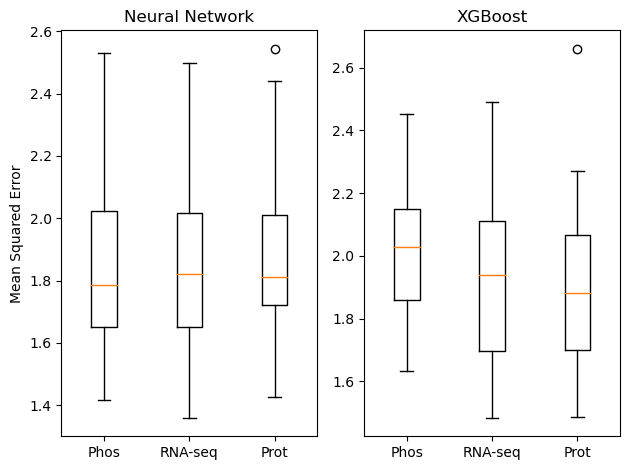

In [43]:
fig, ax = plt.subplots(ncols=2, layout='tight')
ax[0].boxplot([mse_cnn_ltl.iloc[-1], mse_cnn_rna.iloc[-1], mse_cnn_prot.iloc[-1]] )
ax[0].set_xticklabels(['Phos', 'RNA-seq', 'Prot'])
ax[0].set_title('Neural Network')
ax[1].boxplot([mse_xg_ltl.iloc[-1], mse_xg_rna.iloc[-1], mse_xg_prot.iloc[-1]] )
ax[1].set_title('XGBoost')
ax[1].set_xticklabels(['Phos', 'RNA-seq', 'Prot'])
ax[0].set_ylabel('Mean Squared Error')
plt.savefig('BoxPlot.png', dpi=600, bbox_inches='tight')
plt.show()

In [22]:
mse_cnn_phos.iloc[-1].mean()

1.845140904174391

In [19]:
mse_cnn_rna.iloc[-1].mean()

1.8608589231284454

In [18]:
mse_cnn_prot.iloc[-1].mean()

1.8800975618584572